In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from implementations import *
from helpers import *
from data_manager import *
from test_runners import *
from plot import *

### Test consol

runing degree 1
runing degree 2
runing degree 3
runing degree 4
runing degree 5
runing degree 6
Score: % 75.128
Score: % 80.096
Score: % 80.624
Score: % 81.716
Score: % 81.792


/Users/Nino54/Desktop/EPFL/Master/project1/ML_cortana/scripts_propre/plot.py:114: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Score: % 81.964


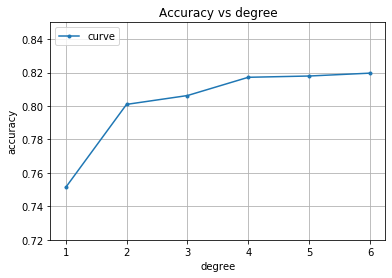

In [3]:
#load train data
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# Data processing
    #nanmed -> replace -999. with mean
    #bound -> eliminate outliers
    #zerovar -> eliminate columns with no varinaces
My_options = ['nanmed', 'bound', 'zerovar']


#Split (split=True) or cross (split=False)
split = True
ratio = 0.8
seed = 1


# Parameters
# Every parameter needs to be in a list (if np.array write inside brackets por favor)
degrees = [np.arange(1,7,1)]
gammas = []
lambdas = []
method = least_squares

# Gradient parameters, indicate if you are using a gradient method (True/False)
Grad_method = False
max_iter = 100
w_init = []

'''Everything above can be modified'''
#************************************************************************************************
'''Everything under should not be modified'''

#pre-processing, spliting datas
y, tX = process_data(y, tX, My_options)
y_tr, x_tr, y_te, x_te = split_data(y, tX, ratio, seed)
grad = [Grad_method, w_init, max_iter]

# creation of weights and scores
if split:
    weights, losses = optimization(y_tr, x_tr, method, degrees, gammas, lambdas, grad)
else:
    weights, losses = optimization_cross(y, tX, method, degrees, gammas, lambdas, grad)

    

# few Plots as example

logistic = False 

if 'prb' in My_options:
    logistic = True
    
if len(weights) == 1:
    if len(degrees[0]) == 1:
        x_te = build_poly(x_te, degrees[0][0])
    test_score(y_te, x_te, weights[0])
elif lambdas :
    if len(lambdas[0]) == 1:
        plot_my_values(weights, y_te, x_te, degrees, gammas, [], logistic)
else :
    plot_my_values(weights, y_te, x_te, degrees, gammas, lambdas, logistic)

### test all the basic implementations

In [4]:
def test_main():
    """
    TEST ALL RAW METHODS with optimal parameters found so far;
    least_square_GD
        parameters :
            gamma = 7*10e-4 
            max_iters = 1000
        pre-processing :
            nanmed
            bound
            std
            
    least_square_SGD
        parameters : 
            gamma = 0.003
            max_iters = 3000
            batch_size = 1
        pre-processing : 
            nanmed
            bound
            std
            
            
    least_squares
        parameters : 
            /
        pre-processing :
            nanmed
            bound
            
    ridge_regression
        parameters : 
            lambda_ = 10e-5
        pre-processing :
            nanmed
            bound
            
    logistic_regression
        parameters :
            max_iters = 4000
            gamma = 10e-7
        pre_processsing :
            nanmed
            bound
            std
            prb
            
    reg_logisitc_regression
       parameters :
             max_iters = 2000
            gamma = 10e-7 
            lambda_ = 0.1
        pre_processsing :
            nanmed
            bound
            std
            prb
     """

 
    
    # Load train and test data
    DATA_TRAIN_PATH = "../data/train.csv"
    y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
    
    print('Data loaded')
    
    methods = ['least_square_GD', 
               'least_square_SGD', 
               'least_squares', 
               'ridge_regression', 
               'logistic_regression', 
               'reg_logistic_regression']
    
    scores = []
    #for each method, store the accuracy score given by the test fucntion
    for method in methods:
        scores.append(test(y, tx, method))

    
    index = np.argmax(scores)   
    print('Best method is ', methods[index], ': score = ', scores[index])
    
test_main()

Data loaded
least square GD learning ongoing...
Score: % 70.748
least square SGD learning ongoing...
Score: % 69.452
least square learning ongoing...
Score: % 74.688
ridge learning ongoing...
Score: % 74.688
logistic regression learning ongoing...
Score: % 75.1365
reg logistic regression learning ongoing...
Score: % 75.09
Best method is  logistic_regression : score =  0.751365


### Model selection

In [22]:
# Load train data
DATA_TRAIN_PATH = "../data/train.csv"
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
print('Data loaded')

#creation of jet_num
jets_y, jets_tX, _ = cat_variables(y, tx, ids)

#iteration in jet_num
for i in range(len(jets_y)):
    
    print('Selection of jet', i)
    
    #options of pre-processing
        #nandel -> delete nan values (-999.)
        #nanmed -> replace -999. with mean
        #bound -> eliminate outliers
        #std -> standardize data set
        #prb -> change y into probability values
        #zerovar -> eliminate columns with no variances
    My_options = ['nanmed', 'bound', 'zerovar']
    
    #pre-processing
    y, processed_tx_train = process_data(jets_y[i], jets_tX[i], My_options)
    print('Data processed')

    # Find the optimal parameters for ridge regression
    optimal_degree, optimal_lambda = optimal_hyperparameters(y, processed_tx_train)

Data loaded
Selection of jet 0
Data processed
best for degree  5  lambda: 1e-12 -> RMSE  =  0.680278061886013
best for degree  6  lambda: 1e-12 -> RMSE  =  0.6793823605223961
best for degree  7  lambda: 1e-12 -> RMSE  =  0.6782717805724462
best for degree  8  lambda: 2.571913809059347e-12 -> RMSE  =  0.6780140644580992
Selection of jet 1
Data processed
best for degree  5  lambda: 2.571913809059347e-12 -> RMSE  =  0.7571239649417154
best for degree  6  lambda: 7.443803013251697e-10 -> RMSE  =  0.7517342195221864
best for degree  7  lambda: 7.443803013251697e-10 -> RMSE  =  0.7507742210248669
best for degree  8  lambda: 1e-12 -> RMSE  =  0.7496615590124668
Selection of jet 2
Data processed
best for degree  5  lambda: 1.9144819761699535e-09 -> RMSE  =  0.7106451707154525
best for degree  6  lambda: 1.1253355826007645e-10 -> RMSE  =  0.7057623927378783
best for degree  7  lambda: 1e-12 -> RMSE  =  0.7045770688251414
best for degree  8  lambda: 1e-12 -> RMSE  =  0.7032418141432465
Selection

## accuracy test for the best model : ridge-regression with poly/cross-term/Jet values

In [63]:
def jet_accuracy_test(y, tX, methods, parameters):
     """
    Method used to test the accuracy with the best model chosen,
    from the train datas that we split into a set of train and a set of test data
    Here we use the ridge_regression, with polynomial construction of parameters and cross-terms
      parameters used for ridge-regression, i.e. lambdas and degres are taken from another method
      that finds optimals parameters
      
    Arguments:
        y: labels
        tX: features matrix
        methods: methhod used, here ridge-regression
        parameters: additional parameters needed for the method, here lambdas
        methods: method chosen for the best model
    """

    
    #ratio and seed for the spitting of datas
    ratio = 0.8
    seed = 1
    
    pred = []
    Y =[]
    
    
    #creation of jet_num
    jets_y, jets_tX, _ = cat_variables(y, tX, ids)
    
    #options of pre-processing
        #nandel -> delete nan values (-999.)
        #nanmed -> replace -999. with mean
        #bound -> eliminate outliers
        #std -> standardize data set
        #prb -> change y into probability values
        #zerovar -> eliminate columns with no variances
    My_options = ['nanmed', 'bound', 'zerovar','std']
    
    #iteration in each jet_num batch
    for ind in range(len(jets_y)):
        
         #pre-process data
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        
        #construction of the final features containing polynomiale features and cross-terms
        final_tX = np.c_[build_poly(jets_tX[ind],degres[ind]), build_cross_terms(jets_tX[ind])]
     
        #splitting the data with a ratio of 0.8 in order to test the accuracy
        y_tr, x_tr, y_te, x_te = split_data(jets_y[ind], final_tX, ratio, seed)
       
        #initial parameters y and tX + additional parameters here gammas
        param = [y_tr, x_tr,gammas[ind]]

        #construction of weights and losses
        w,loss = test_methods(methods, param)
        
        #creation of prediction accuracy for each jt_num batch
        pred_test = predict(x_te, w)
        print("jet number : ", ind)
        print("validation accuracy : ", np.sum(pred_test==y_te)/pred_test.shape[0])
        
        #lists of prediction and ids for each jet batch
        pred.append(pred_test)
        Y.append(y_te)
    
    # concatenation lists of labels and predictions for each jet batch in a single well arranged array
    pred =np.concatenate(pred, 0)
    Y = np.concatenate(Y,0)
    
    #final accuracy for the whole model
    print("total accuracy :", np.sum(pred==Y)/pred.shape[0])
    
#best parameters found
gammas = [1e-12,7.443803013251697e-10,1.1253355826007645e-10,1.7012542798525856e-11]
degres = [6,7,6,6]
parameters = gammas

#load the datas
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
jet_accuracy_test(y, tX, ridge_regression, parameters)



jet number :  0
validation accuracy :  0.8552269429014663
jet number :  1
validation accuracy :  0.8110129602166484
jet number :  2
validation accuracy :  0.8401151250496228
jet number :  3
validation accuracy :  0.8490863974734942
total accuracy : 0.8379232415351693


## submission of prediction with the best model : ridge-regresion with poly/cross-term/jet values

In [5]:
def main (methods):
    """
      Main method, creating a submission .csv of predictions with the best model chosen
      here we use the ridge_regression, with polynomiale construction of parameters and cross-terms
      parameters used for ridge-regression, i.e. lambdas and degres are taken from another method
      that finds optimals parameters
    Arguments:       
        methods: method chosen for the best model
    """

    
    #load datas 
    """
    y: labels for train
    tx: features matrix for train
    y_test: labels for test
    tx_test: features matrix for test
    """
    DATA_TRAIN_PATH = '../data/train.csv' 
    y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

    DATA_TEST_PATH = '../data/test.csv' 
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    
    print("data loaded")

    #best parameters found from learning
    gammas = [1e-12,7.443803013251697e-10,1.1253355826007645e-10,1.7012542798525856e-11]
    degres = [6,7,6,6]
    
    
    pred = []
    id_t =[]
    
    #creation of jet_num
    jets_y, jets_tX, _ = cat_variables(y, tX, ids)
    jets_y_test, jets_tX_test, id_test = cat_variables(y_test, tX_test, ids_test)
    
    #options of pre-processing
        #nandel -> delete nan values (-999.)
        #nanmed -> replace -999. with mean
        #bound -> eliminate outliers
        #std -> standardize data set
        #prb -> change y into probability values
        #zerovar -> eliminate columns with no variances
    My_options = ['nanmed', 'bound', 'zerovar','std']
    
    #iteration in each jet_num batch
    for ind in range(len(jets_y)):
        print('Analyzing jet {}'.format(ind))
        
        #pre-process data (train and test)
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        jets_y_test[ind], jets_tX_test[ind] = process_data(jets_y_test[ind], jets_tX_test[ind], My_options)

        #construction of the final features containing polynomiale features and cross-terms
        final_tX_train = np.c_[build_poly(jets_tX[ind],degres[ind]), build_cross_terms(jets_tX[ind])]
        final_tX_test = np.c_[build_poly(jets_tX_test[ind],degres[ind]), build_cross_terms(jets_tX_test[ind])]

        #parameters token by the chosen method
        param = [jets_y[ind], final_tX_train, gammas[ind]]
       
        #create weights and losses
        w,loss = test_methods(methods, param)
        
        #creation of predictions
        pred_test = predict(final_tX_test,w)
        
        #lists of prediction and ids for each jet batch
        pred.append(pred_test)
        id_t.append(id_test[ind])


 
    # concatenation lists of ids and predictions for each jet batch in a single well arranged array
    pred =np.concatenate(pred, 0)
    id_t =np.concatenate(id_t,0)


    #submission
    OUTPUT_PATH = "../data/submissioncortana.csv"    
    create_csv_submission(id_t, pred, OUTPUT_PATH)
    print('Submission saved as ', OUTPUT_PATH)


main(ridge_regression)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Analyzing jet 0
Analyzing jet 1
Analyzing jet 2
Analyzing jet 3
Submission saved as  submissionfloflolog.csv
